In [1]:
import sklearn
from sklearn import datasets
from PIL import Image
from IPython.display import Image as IPImage
import numpy as np
from sklearn.linear_model import LogisticRegression as LR
from sklearn.decomposition import PCA
import sklearn
import pandas

In [2]:
face=sklearn.datasets.fetch_olivetti_faces(shuffle=True)
X,Y = [face.data,face.target]
X_out = X
X = np.reshape(X, (-1, 1, 64, 64))
X[0,0,0,0]

0.66942149

In [3]:
Y.shape

(400,)

In [6]:
X_train,X_test = [X_out[0:200],X_out[200:400]]
Y_train,Y_test = [Y[0:200],Y[200:400]]

In [7]:
def train_and_eval( model, train_x, train_y, test_x, test_y ):
    model.fit( train_x, train_y )
    p = model.predict( test_x )
    OA = sum(test_y==p)/len(test_y)
    return OA

In [8]:
lr = LR(C=1)
auc = train_and_eval( lr, X_train, Y_train, \
    X_test, Y_test )
auc

0.89000000000000001

In [30]:
svm=sklearn.svm.SVC(kernel='linear',C=1,shrinking=False)
auc = train_and_eval( lr, X_train, Y_train, \
    X_test, Y_test )
auc

0.89000000000000001

In [9]:
pca = PCA(n_components=30)
pcomp = pca.fit_transform(X_out)

In [10]:
X_pcomp_train,X_pcomp_test = [pcomp[0:200],pcomp[200:400]]

In [11]:
lr = LR(C=1)
auc = train_and_eval( lr, X_pcomp_train, Y_train, \
    X_pcomp_test, Y_test )
auc

0.88

In [12]:
svm=sklearn.svm.SVC(kernel='linear',C=1,shrinking=False)
auc = train_and_eval( lr, X_pcomp_train, Y_train, \
    X_pcomp_test, Y_test )
auc

0.88

In [13]:
pc = pcomp[:,:2]

In [14]:
d = {'pc1': pc[:,0], 'pc2': pc[:,1], 'label':Y}

In [15]:
df = pandas.DataFrame(data=d)

In [17]:
from bokeh.charts import Scatter, output_notebook, show

p = Scatter(df, x='pc1', y='pc2', color='label', title="PC1 vs PC2",
            xlabel="PC1", ylabel="PC2")

output_notebook()

show(p)

Loading BokehJS ...

In [18]:
pca_reconstruct = pca.inverse_transform(pcomp)

In [19]:
pca_reconstruct.shape

(400, 4096)

In [20]:
def get_picture_array(X, rescale=2):
    array = X.reshape(64,64)
    array = np.clip(array, a_min = 0, a_max = 255)
    return  array.repeat(rescale, axis = 0).repeat(rescale, axis = 1).astype(np.uint8())

def compare_images(index):
    print(index)
    original_image = Image.fromarray(get_picture_array(255 * X[index]))
    new_size = (original_image.size[0] * 2, original_image.size[1])
    new_im = Image.new('L', new_size)
    new_im.paste(original_image, (0,0))
    rec_image = Image.fromarray(get_picture_array(255 * pca_reconstruct[index]))
    new_im.paste(rec_image, (original_image.size[0],0))
    new_im.save('test.png', format="PNG")
    return IPImage('test.png')

6


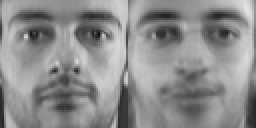

In [26]:
compare_images(6)

In [29]:
original_image = Image.fromarray(get_picture_array(255 * X[0]))
original_image.size

(128, 128)

In [ ]:
def compare_images_array(index):
    length = len(index)
    original_image = Image.fromarray(get_picture_array(255 * X[index[0]]))
    width,height = original_image.size
    new_size = (width * length, height*3)
    new_im = Image.new('L', new_size)
    for i in range(length):
        original_image = Image.fromarray(get_picture_array(255 * X[index[i]]))
        CAE_image = Image.fromarray(get_picture_array(255 * X_pred[index[i]]))
        pca_image = Image.fromarray(get_picture_array(255 * pca_reconstruct[index[i]]))
        new_im.paste(original_image, (i*width,0))
        new_im.paste(CAE_image, (i*width,height))
        new_im.paste(pca_image, (i*width,height*2))
    new_im.save('test.png', format="PNG")
    return IPImage('test.png')